# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

#### note to grader --I changed the title : The challenge is for module 11 not 12

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
import numpy as np


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows

# Loop through each row in the table on the website
for row in rows:
    # Extract all columns in the row
    cols = row.find_all('td')
    
    # Check if the current row is the header or a row with the expected number of columns
    if len(cols) == 7:
        # Create an empty dictionary to store the row data
        row_data = {}
        # Store each piece of information in the dictionary using the appropriate key
        row_data['id'] = cols[0].text
        row_data['terrestrial_date'] = cols[1].text
        row_data['sol'] = cols[2].text
        row_data['ls'] = cols[3].text
        row_data['month'] = cols[4].text
        row_data['min_temp'] = cols[5].text
        row_data['pressure'] = cols[6].text
        
        # Append the dictionary to the data list
        data.append(row_data)



In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data)

In [8]:
# Confirm DataFrame was created successfully

In [9]:
# Display the DataFrame
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column


In [11]:
# Display the current data types
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# Change data types for data analysis

In [13]:

# Convert the 'terrestrial_date' column to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

In [14]:
# Convert 'sol', 'ls', 'min_temp', and 'pressure' to appropriate numerical data types
# Assuming these should be integers or floats without missing data or n/a
mars_weather_df['sol'] = mars_weather_df['sol'].astype("int64")
mars_weather_df['ls'] = mars_weather_df['ls'].astype("int64")
mars_weather_df['month'] = mars_weather_df['month'].astype("int64")
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [15]:
# Confirm type changes were successful by examining data types again

In [16]:
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [17]:
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


#### 1. How many months are there on Mars?

In [18]:

# Then count the occurrences of each month using value_counts()
month_counts = mars_weather_df['month'].value_counts().sort_index()

# month_counts now holds the frequency of each month, sorted by month number

# You can print month_counts to see the occurrences of each month
print(month_counts)

# Optionally, you can sum the values to ensure it adds up to 1867
total_rows = month_counts.sum()
print(f"Total rows: {total_rows}")

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64
Total rows: 1867


In [19]:
# Count the number of  months in the dataset
unique_months = mars_weather_df['month'].nunique()

# Print the number of unique months
print(f"------------------------------------------------------")
print(f"There are {unique_months} months on Mars according to NASA data.")
print(f"------------------------------------------------------")

------------------------------------------------------
There are 12 months on Mars according to NASA data.
------------------------------------------------------


#### 2. How many Martian days' worth of data are there?

In [20]:
# Count the number of unique Martian days (sols) in the dataset
unique_martian_days = mars_weather_df['sol'].nunique()

# Print the number of unique Martian days
print(f"------------------------------------------------------")
print(f"There are {unique_martian_days} Martian days' worth of data in the Mars Temperature Data table")
print(f"------------------------------------------------------")

------------------------------------------------------
There are 1867 Martian days' worth of data in the Mars Temperature Data table
------------------------------------------------------


####  3. What is the average low temperature by month?

In [21]:
# Group the data by 'month' and then calculate the mean 'min_temp' for each group
average_low_temps_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Print the average low temperature by month
print(f"------------------------------------------------------")
print(f"The average low temperature by month on Mars according to NASA data.")
print(f"------------------------------------------------------")
print(average_low_temps_by_month)
print(f"------------------------------------------------------")

------------------------------------------------------
The average low temperature by month on Mars according to NASA data.
------------------------------------------------------
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64
------------------------------------------------------


####  Plot the average temperature by month

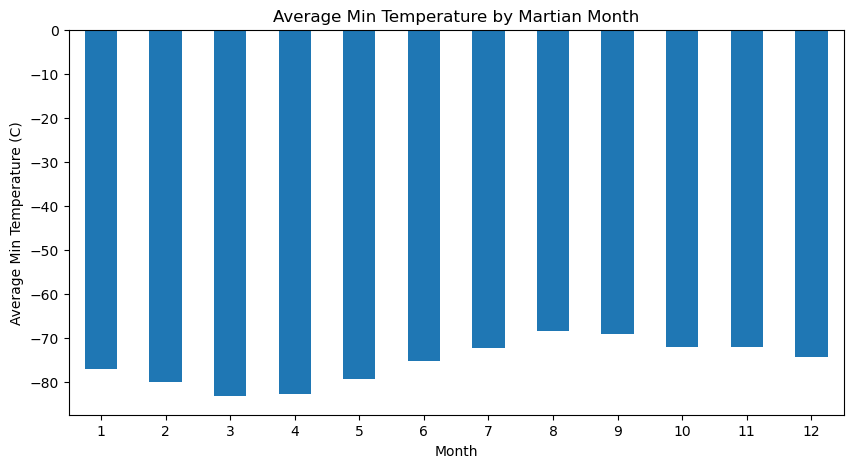

In [22]:
# Plot the average temperature by month

# Create a bar chart for average low temperature by month
average_low_temps_by_month.plot(kind='bar', figsize=(10, 5))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (C)')
plt.title('Average Min Temperature by Martian Month')
plt.xticks(rotation=0)  # Rotates X-axis labels to horizontal

# Show the plot
plt.show()

In [23]:
# Identify the coldest and hottest months in Curiosity's location

note to grader :Two graphs were created THIS WAS NOT PART OF THE CHALLENGE 

The graphs show two different ways to show the highest and lowest.  This was done to clarify and exploit graphical capabilities.  

##### This is a good representation to demonstrate hotest and coldest month.  

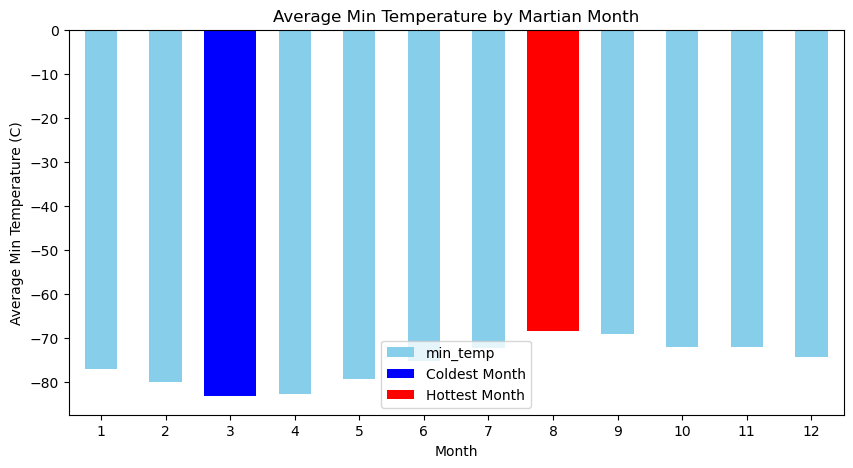

-------------------------------------------------------------------------------------
The coldest month is: 3 with an average temperature of -83.31 C
The hottest month is: 8 with an average temperature of -68.38 C
-------------------------------------------------------------------------------------


In [24]:


# Find the coldest and hottest months by identifying the min and max average temperatures
coldest_month = average_low_temps_by_month.idxmin()
hottest_month = average_low_temps_by_month.idxmax()

# Create a bar chart for average low temperature by month
average_low_temps_by_month.plot(kind='bar', figsize=(10, 5), color='skyblue')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (C)')
plt.title('Average Min Temperature by Martian Month')
plt.xticks(rotation=0)  # Rotates X-axis labels to horizontal

# Highlight the coldest and hottest months
plt.bar(coldest_month - 1, average_low_temps_by_month[coldest_month], color='blue', label='Coldest Month')
plt.bar(hottest_month - 1, average_low_temps_by_month[hottest_month], color='red', label='Hottest Month')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Print out the coldest and hottest months with their respective temperatures
print(f"-------------------------------------------------------------------------------------")
print(f"The coldest month is: {coldest_month} with an average temperature of {average_low_temps_by_month[coldest_month]:.2f} C")
print(f"The hottest month is: {hottest_month} with an average temperature of {average_low_temps_by_month[hottest_month]:.2f} C")
print(f"-------------------------------------------------------------------------------------")

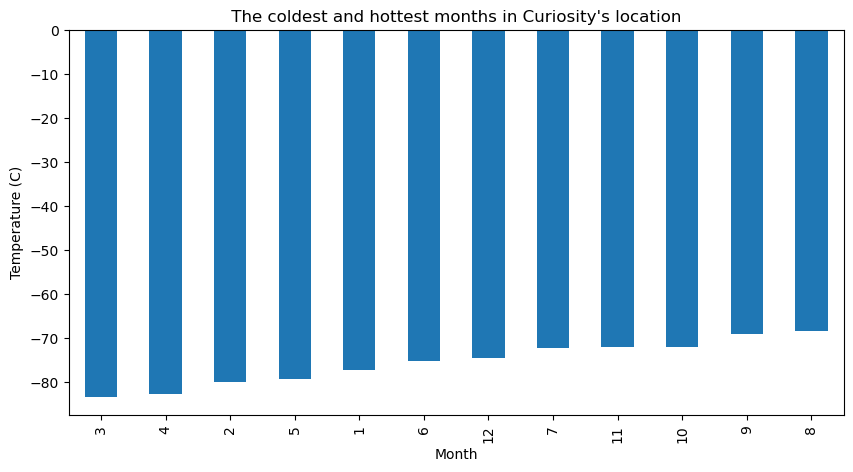

-------------------------------------------------------------------------------------
The coldest month is: 3 with an average temperature of -83.31 C
The hottest month is: 8 with an average temperature of -68.38 C
-------------------------------------------------------------------------------------


In [25]:

# Sort the average low temperatures by value in ascending order
sorted_avg_low_temps = average_low_temps_by_month.sort_values()

# Create a bar chart for the sorted average low temperatures
sorted_avg_low_temps.plot(kind='bar', figsize=(10, 5))

# Add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.title(" The coldest and hottest months in Curiosity's location ")
# Show the plot
plt.show()

# Print out the coldest and hottest months with their respective temperatures
print(f"-------------------------------------------------------------------------------------")
print(f"The coldest month is: {coldest_month} with an average temperature of {average_low_temps_by_month[coldest_month]:.2f} C")
print(f"The hottest month is: {hottest_month} with an average temperature of {average_low_temps_by_month[hottest_month]:.2f} C")
print(f"-------------------------------------------------------------------------------------")

##### 4. Average pressure by Martian month


In [26]:
# Group the data by 'month' and calculate the mean 'pressure' for each group
average_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Print the average pressure by month
print(f"-------------------------------------------------------------------------------------")
print(f"The Average pressure by Martian month")

print(f"-------------------------------------------------------------------------------------")
print(average_pressure_by_month)
print(f"-------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------
The Average pressure by Martian month
-------------------------------------------------------------------------------------
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64
-------------------------------------------------------------------------------------


###### Plot the average pressure by month

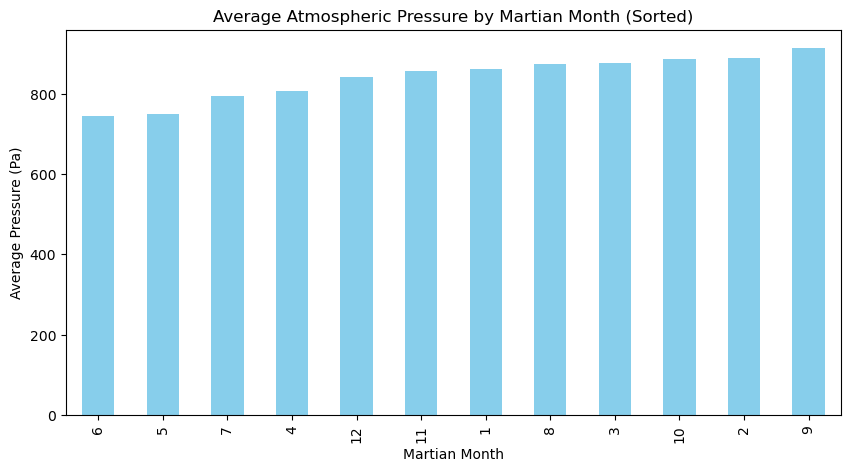

In [27]:
# Sort average pressures in ascending order
sorted_avg_pressure = average_pressure_by_month.sort_values()

# Create a bar chart for the sorted average pressures
sorted_avg_pressure.plot(kind='bar', figsize=(10, 5), color='skyblue')

# Add labels and title to the plot
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Martian Month (Sorted)')

# Show the plot
plt.show()

#### 5. How many terrestrial (earth) days are there in a Martian year?

In [28]:

# Calculate the average length of a Martian solar day in Earth days.
earth_days_elapsed = (mars_weather_df['terrestrial_date'].max() - mars_weather_df['terrestrial_date'].min()).days
solar_days_elapsed = mars_weather_df['sol'].max() - mars_weather_df['sol'].min()

# Assure that solar_days_elapsed is not zero to avoid division by zero
if solar_days_elapsed != 0:
    average_length_of_sol_in_earth_days = earth_days_elapsed / solar_days_elapsed
else:
    average_length_of_sol_in_earth_days = float('nan')  # Not a Number, because can't divide by zero

# Print calculations
print(f"-------------------------------------------------------------------------------------")
print(f"Earth days elapsed: {earth_days_elapsed}")
print(f"Solar days elapsed: {solar_days_elapsed}")
print(f"Average length of solar days in Earth days: {average_length_of_sol_in_earth_days}")
print(f"A solar day is {average_length_of_sol_in_earth_days} earth days")
print(f"-------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------
Earth days elapsed: 2021
Solar days elapsed: 1967
Average length of solar days in Earth days: 1.0274529740721912
A solar day is 1.0274529740721912 earth days
-------------------------------------------------------------------------------------


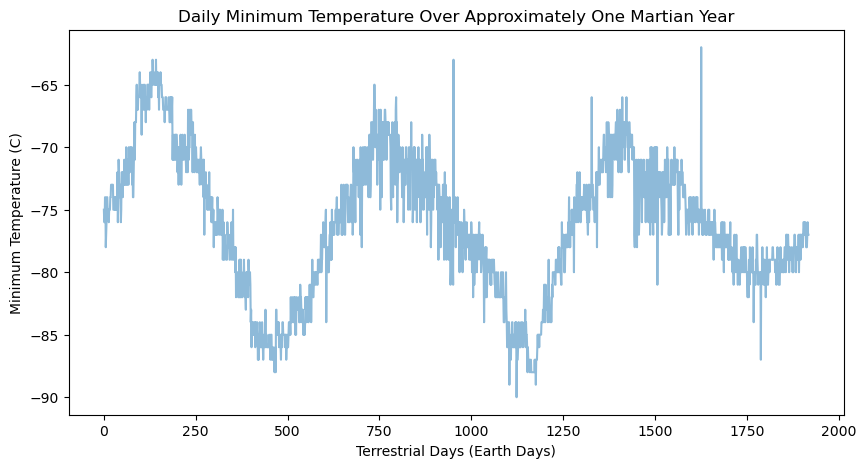

In [29]:


# The index of  DataFrame 'mars_weather_df' represents the chronological order of sols, adjust to Earth days
mars_weather_df['terrestrial_day'] = mars_weather_df.index * average_length_of_sol_in_earth_days

# Dataframe `mars_weather_df` has 'min_temp' values already and has been sorted by 'terrestrial_day'
# Now plot the terrestrial days (Earth days) as a line graph against the minimum temperature
plt.figure(figsize=(10, 5))
plt.plot(mars_weather_df['terrestrial_day'], mars_weather_df['min_temp'], alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Terrestrial Days (Earth Days)')
plt.ylabel('Minimum Temperature (C)')
plt.title('Daily Minimum Temperature Over Approximately One Martian Year')

# Show the plot
plt.show()

#### Find the dates in the two troughs 

In [36]:
cold_days_df = mars_weather_df[mars_weather_df['min_temp'] < -87]

# Select only the 'id' and 'terrestrial_date' columns from the filtered DataFrame
cold_days_info = cold_days_df['terrestrial_date']
# Print the results
print(cold_days_info)

452    2014-02-03
455    2014-02-06
1074   2015-11-20
1093   2015-12-09
1122   2016-01-08
1128   2016-01-14
1129   2016-01-15
1132   2016-01-18
1133   2016-01-19
1134   2016-01-20
1135   2016-01-21
1136   2016-01-22
1137   2016-01-23
1138   2016-01-24
1139   2016-01-26
1140   2016-01-27
1142   2016-01-29
1144   2016-01-31
Name: terrestrial_date, dtype: datetime64[ns]


##### From the two trough the lowest temperatures are  the first week of February 2014 and the third week of January 2016 : 1135(Jan 21 2016) - 

##### 1135(Jan 21 2016) - 452  (Feb 03 2014) this is 683 earth days

#### 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV

In [ ]:


# Define the name of the file to save the data
csv_file_name = 'mars_weather_data.csv'

# Export the DataFrame to a CSV file
mars_weather_df.to_csv(csv_file_name, index=False)

# Confirm the file has been saved
print(f"Data saved to {csv_file_name}")

In [ ]:
browser.quit()